In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

In [2]:
w_data=pd.read_csv("weatherHistory.csv")
print(w_data.shape)
w_data.head()

(96453, 12)


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [3]:
w_data.describe()

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

In [4]:
w_data = w_data.rename(columns = {"Apparent Temperature (C)":"Apparent_Temperature_C"})

In [5]:
uniqueValues = w_data.nunique()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(uniqueValues)

Formatted Date            96429
Summary                      27
Precip Type                   2
Temperature (C)            7574
Apparent_Temperature_C     8984
Humidity                     90
Wind Speed (km/h)          2484
Wind Bearing (degrees)      360
Visibility (km)             949
Loud Cover                    1
Pressure (millibars)       4979
Daily Summary               214
dtype: int64


In [6]:
#dropping loud cover as all rows have 0 as value
w_data=w_data.drop(['Loud Cover','Daily Summary'],axis=1)
w_data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent_Temperature_C  Humidity  Wind Speed (km/h)  \
0                7.388889      0.89            14.1197   
1                7.227778      0.86            14.2646   
2                9.377778      0.89             3.9284   
3                5.944444      0.83            14.1036   
4                6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
0                   251.0          15.8263               1015.13  
1                   259.0          15.8263               1015.63  
2                   204.0          14.9569               1015.94  
3                   269.0          15.8263               1016.41  
4                   259.0          15.8263               1016.51

In [7]:
#extracting month from date column
w_data['Formatted Date']=pd.to_datetime(w_data['Formatted Date'],utc=True)
w_data['month']=w_data['Formatted Date'].dt.month
w_data=w_data.drop('Formatted Date',axis=1)
w_data.head()

Summary Precip Type  Temperature (C)  Apparent_Temperature_C  \
0  Partly Cloudy        rain         9.472222                7.388889   
1  Partly Cloudy        rain         9.355556                7.227778   
2  Mostly Cloudy        rain         9.377778                9.377778   
3  Partly Cloudy        rain         8.288889                5.944444   
4  Mostly Cloudy        rain         8.755556                6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   
3      0.83            14.1036                   269.0          15.8263   
4      0.83            11.0446                   259.0          15.8263   

   Pressure (millibars)  month  
0               1015.13      3  
1               1015.63      3  
2               1015.94      4  
3               1016.41      4  
4               1016.51      4

In [8]:
categorical = w_data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Summary', 'Precip Type'], dtype='object')


In [9]:
quantitative = w_data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent_Temperature_C', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'month'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193C9EF1A00>,
      dtype=object)

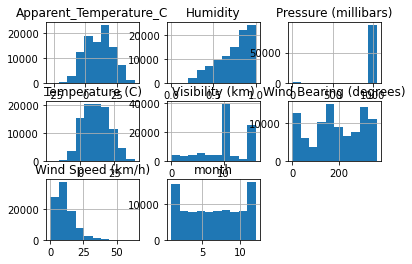

In [10]:
# figure = plt.figure(figsize = (300,300))
w_data[quantitative].hist()

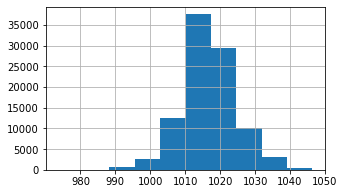

In [11]:
pressure_median = w_data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
w_data["Pressure (millibars)"] = w_data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

# rcParams['figure.figsize'] = 5, 3
figure = plt.figure(figsize = (5,3))
w_data['Pressure (millibars)'].hist()

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64


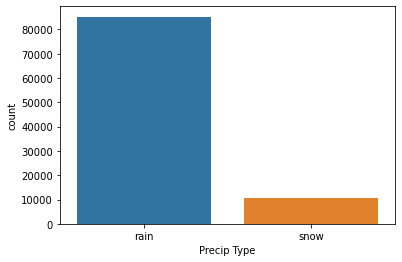

In [12]:
#label encoding precip type column
print(w_data['Precip Type'].value_counts(dropna=False))

sns.countplot(x=w_data['Precip Type'])

In [13]:
w_data['Precip Type']=w_data['Precip Type'].replace(['rain','snow'],[0,1])
w_data['Precip Type']=w_data['Precip Type'].replace(np.nan,0)
print(w_data['Precip Type'].value_counts())

0.0    85741
1.0    10712
Name: Precip Type, dtype: int64


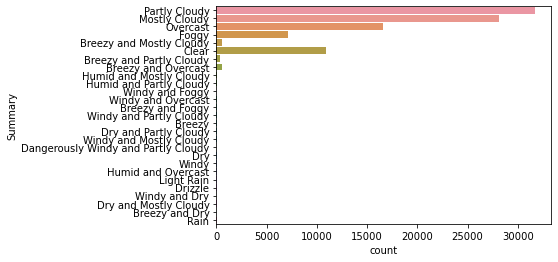

In [14]:
sns.countplot(y=w_data['Summary'])

In [15]:
#label encoding summary type column
print(w_data['Summary'].value_counts())
w_data['Summary']=w_data['Summary'].replace(w_data['Summary'].unique(),range(0,len(w_data['Summary'].unique())))
print(w_data['Summary'].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [16]:
#skew
for i in w_data.columns.values:
    print(i+"\t"+str(w_data[i].skew()))

Summary	3.2139052755369812
Precip Type	2.4757475503013815
Temperature (C)	0.0941265823519837
Apparent_Temperature_C	-0.057302298604396174
Humidity	-0.715880427565631
Wind Speed (km/h)	1.1134929678251169
Wind Bearing (degrees)	-0.15464320132703985
Visibility (km)	-0.4987118639375197
Pressure (millibars)	0.08411368123706085
month	-0.009476092809114676


In [17]:
#reducing skewness
print(np.sqrt(w_data['Summary']).skew())
w_data['Summary']=np.sqrt(w_data['Summary'])
print(np.sqrt(w_data['Wind Speed (km/h)']).skew())
w_data['Wind Speed (km/h)']=np.sqrt(w_data['Wind Speed (km/h)'])
print(w_data.shape)
w_data=w_data.loc[w_data['Pressure (millibars)']>0,:]
print(w_data.shape)
print(w_data['Pressure (millibars)'].skew())

0.33709211383978316
-0.022198407957613634
(96453, 10)
(96453, 10)
0.08411368123706085


In [18]:
w_data.head()

Summary  Precip Type  Temperature (C)  Apparent_Temperature_C  Humidity  \
0      0.0          0.0         9.472222                7.388889      0.89   
1      0.0          0.0         9.355556                7.227778      0.86   
2      1.0          0.0         9.377778                9.377778      0.89   
3      0.0          0.0         8.288889                5.944444      0.83   
4      1.0          0.0         8.755556                6.977778      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0           3.757619                   251.0          15.8263   
1           3.776851                   259.0          15.8263   
2           1.982019                   204.0          14.9569   
3           3.755476                   269.0          15.8263   
4           3.323342                   259.0          15.8263   

   Pressure (millibars)  month  
0               1015.13      3  
1               1015.63      3  
2               1015.94      4  
3               1016.41      4  
4               1016.51      4

In [19]:
w_data.describe()

Summary   Precip Type  Temperature (C)  Apparent_Temperature_C  \
count  96453.000000  96453.000000     96453.000000            96453.000000   
mean       0.973025      0.111059        11.932678               10.855029   
std        0.805555      0.314207         9.551546               10.696847   
min        0.000000      0.000000       -21.822222              -27.716667   
25%        0.000000      0.000000         4.688889                2.311111   
50%        1.000000      0.000000        12.000000               12.000000   
75%        1.414214      0.000000        18.838889               18.838889   
max        5.099020      1.000000        39.905556               39.344444   

           Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
count  96453.000000       96453.000000            96453.000000   
mean       0.734899           3.105750              187.509232   
std        0.195473           1.079336              107.383428   
min        0.000000           0.000000                0.000000   
25%        0.600000           2.414167              116.000000   
50%        0.780000           3.156881              180.000000   
75%        0.890000           3.759761              290.000000   
max        1.000000           7.990782              359.000000   

       Visibility (km)  Pressure (millibars)         month  
count     96453.000000          96453.000000  96453.000000  
mean         10.347325           1016.809278      6.523001  
std           4.192123              7.726359      3.448501  
min           0.000000            973.780000      1.000000  
25%           8.339800           1012.200000      4.000000  
50%          10.046400           1016.450000      7.000000  
75%          14.812000           1021.090000     10.000000  
max          16.100000           1046.380000     12.000000

In [20]:
w_data[:1000]

Summary  Precip Type  Temperature (C)  Apparent_Temperature_C  Humidity  \
0    0.000000          0.0         9.472222                7.388889      0.89   
1    0.000000          0.0         9.355556                7.227778      0.86   
2    1.000000          0.0         9.377778                9.377778      0.89   
3    0.000000          0.0         8.288889                5.944444      0.83   
4    1.000000          0.0         8.755556                6.977778      0.83   
5    0.000000          0.0         9.222222                7.111111      0.85   
6    0.000000          0.0         7.733333                5.522222      0.95   
7    0.000000          0.0         8.772222                6.527778      0.89   
8    0.000000          0.0        10.822222               10.822222      0.82   
9    0.000000          0.0        13.772222               13.772222      0.72   
10   0.000000          0.0        16.016667               16.016667      0.67   
11   0.000000          0.0        17.144444               17.144444      0.54   
12   0.000000          0.0        17.800000               17.800000      0.55   
13   0.000000          0.0        17.333333               17.333333      0.51   
14   0.000000          0.0        18.877778               18.877778      0.47   
15   0.000000          0.0        18.911111               18.911111      0.46   
16   0.000000          0.0        15.388889               15.388889      0.60   
17   1.000000          0.0        15.550000               15.550000      0.63   
18   1.000000          0.0        14.255556               14.255556      0.69   
19   1.000000          0.0        13.144444               13.144444      0.70   
20   1.000000          0.0        11.550000               11.550000      0.77   
21   1.000000          0.0        11.183333               11.183333      0.76   
22   0.000000          0.0        10.116667               10.116667      0.79   
23   1.000000          0.0        10.200000               10.200000      0.77   
24   0.000000          0.0        10.422222               10.422222      0.62   
25   0.000000          0.0         9.911111                7.566667      0.66   
26   1.000000          0.0        11.183333               11.183333      0.80   
27   0.000000          0.0         7.155556                5.044444      0.79   
28   0.000000          0.0         6.111111                4.816667      0.82   
29   0.000000          0.0         6.788889                4.272222      0.83   
30   1.000000          0.0         7.261111                5.155556      0.85   
31   1.000000          0.0         7.800000                5.527778      0.83   
32   1.000000          0.0         9.872222                7.933333      0.78   
33   1.000000          0.0        12.222222               12.222222      0.72   
34   1.000000          0.0        15.094444               15.094444      0.61   
35   1.000000          0.0        17.355556               17.355556      0.52   
36   1.000000          0.0        19.005556               19.005556      0.46   
37   1.000000          0.0        20.044444               20.044444      0.40   
38   1.000000          0.0        21.050000               21.050000      0.40   
39   1.000000          0.0        21.183333               21.183333      0.37   
40   1.000000          0.0        20.116667               20.116667      0.40   
41   1.000000          0.0        20.216667               20.216667      0.36   
42   1.000000          0.0        20.000000               20.000000      0.43   
43   1.000000          0.0        17.800000               17.800000      0.50   
44   1.000000          0.0        16.061111               16.061111      0.53   
45   1.000000          0.0        15.022222               15.022222      0.55   
46   1.414214          0.0        14.422222               14.422222      0.58   
47   1.414214          0.0        14.255556               14.255556      0.59   
48   1.414214          0.0        13.

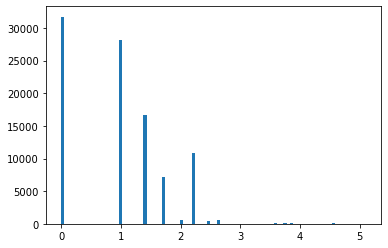

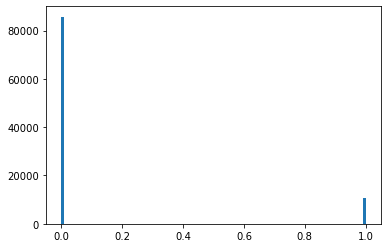

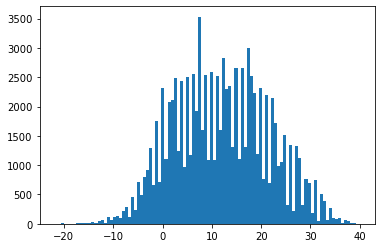

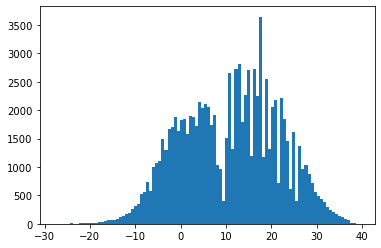

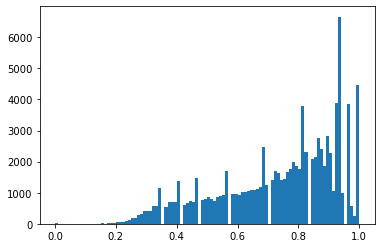

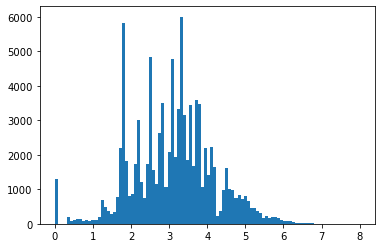

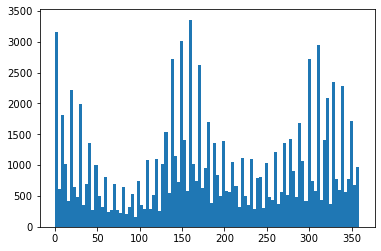

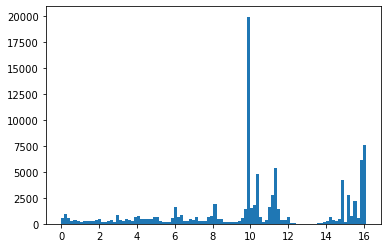

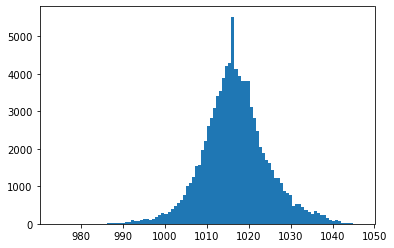

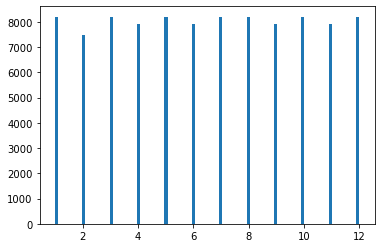

In [21]:
for i in w_data.columns:
    plt.figure()
    plt.hist(w_data[i], bins=100)

In [22]:
uniqueValues = w_data.nunique()

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(uniqueValues)

Summary                     27
Precip Type                  2
Temperature (C)           7574
Apparent_Temperature_C    8984
Humidity                    90
Wind Speed (km/h)         2484
Wind Bearing (degrees)     360
Visibility (km)            949
Pressure (millibars)      4978
month                       12
dtype: int64


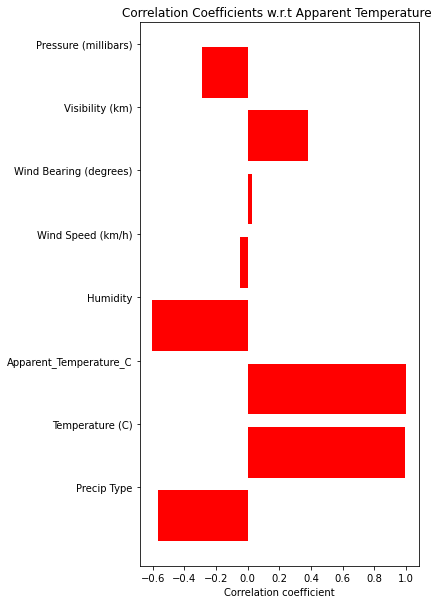

In [24]:
num_feat=w_data.columns[w_data.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(w_data[col].values, w_data.Apparent_Temperature_C.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Apparent Temperature ");

In [25]:
# y=pd.DataFrame()
y=pd.DataFrame(w_data['Apparent_Temperature_C'])
X=w_data.drop('Apparent_Temperature_C',axis=1)

In [27]:
import pickle
pickle.dump(X, open('X_preprocessed.sav', 'wb'))
pickle.dump(y, open('Y_preprocessed.sav', 'wb'))

In [36]:
X.head()

Summary  Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0      0.0          0.0         9.472222      0.89           3.757619   
1      0.0          0.0         9.355556      0.86           3.776851   
2      1.0          0.0         9.377778      0.89           1.982019   
3      0.0          0.0         8.288889      0.83           3.755476   
4      1.0          0.0         8.755556      0.83           3.323342   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  month  
0                   251.0          15.8263               1015.13      3  
1                   259.0          15.8263               1015.63      3  
2                   204.0          14.9569               1015.94      4  
3                   269.0          15.8263               1016.41      4  
4                   259.0          15.8263               1016.51      4

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
regressor = LinearRegression()  
LIR=regressor.fit(X_train, y_train) 

In [30]:
y_predLIR = LIR.predict(X_test)

In [31]:
y_test = np.array(y_test)
y_predLIR = np.array(y_predLIR)

In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predLIR.flatten()})
df

Actual  Predicted
0      14.422222  14.642646
1      12.155556  10.727256
2      23.961111  24.392221
3      15.000000  14.619527
4      12.800000  12.477738
5      11.088889  10.373128
6      -2.944444  -1.989824
7      12.733333  11.520052
8      27.916667  28.376024
9      20.211111  20.927931
10     -6.550000  -6.358782
11     11.111111   9.847059
12     12.500000  12.575812
13     16.138889  17.639218
14     12.155556  10.298907
15     16.488889  17.108006
16     18.400000  18.696336
17     11.666667  12.512764
18     15.027778  14.999160
19      4.955556   5.727796
20     18.366667  18.085305
21     10.388889   8.743107
22     27.666667  27.925807
23     -4.666667  -2.666049
24     -5.511111  -4.501603
25      1.127778   2.090392
26      3.783333   4.523806
27     -4.933333  -6.772888
28     21.066667  20.840106
29     12.105556  11.691999
30     23.055556  23.299160
31     -8.838889 -11.567037
32     28.266667  29.424467
33     25.350000  25.833633
34     17.255556  16.798107
35     21.061111  20.732493
36     13.938889  12.264181
37     15.855556  14.455581
38     -8.766667  -7.252651
39     -8.000000  -6.109540
40     23.794444  23.693510
41     16.550000  15.267033
42     21.038889  22.963890
43     18.838889  17.045108
44     25.000000  24.289760
45     22.777778  23.585731
46     -1.538889  -1.327726
47      9.933333  10.571637
48     12.172222  10.460380
49      7.222222   6.673538
50     26.083333  25.316292
51     24.438889  25.499079
52     17.755556  17.547363
53     -0.333333   1.194278
54     11.061111   9.753787
55     17.294444  16.479512
56      0.333333   0.892958
57     26.661111  28.055386
58      6.138889   5.907489
59      8.788889   8.430653
60      5.372222   5.812222
61      1.672222   0.631529
62     13.527778  13.883612
63      6.888889   6.975869
64      4.305556   5.152334
65     23.772222  22.597085
66     26.816667  28.111856
67     -2.050000  -4.297646
68     -0.244444   0.767041
69      3.938889   4.657874
70     10.044444   7.591244
71     12.405556  12.896255
72     22.677778  22.981966
73     -0.077778   0.225440
74     17.177778  16.609261
75      4.844444   5.551754
76     22.705556  23.628963
77     24.755556  25.505748
78     16.066667  16.218725
79      2.283333   3.614706
80     -1.938889  -3.432346
81     -3.594444  -3.112963
82     -0.016667   0.793400
83      2.927778   3.574362
84      2.711111   1.583036
85      0.822222   1.661442
86     26.433333  27.991932
87      6.300000   5.321324
88     -3.333333  -4.461434
89     11.038889   9.189293
90     -1.772222  -0.664068
91     17.105556  16.984313
92     21.000000  22.058413
93      3.211111   3.936396
94     19.111111  20.608053
95     -2.783333  -1.579728
96     10.788889   9.716243
97     34.133333  36.113488
98      6.705556   7.452806
99      6.094444   5.684292
100    23.933333  24.293469
101     7.211111   7.514283
102    17.050000  17.421897
103    -0.161111   0.106942
104    10.488889   9.884212
105    18.866667  17.932199
106     6.366667   6.491336
107     2.444444   2.639604
108    17.105556  16.246213
109    20.122222  19.386377
110    20.227778  21.129739
111    14.377778  13.141886
112     3.577778   4.187494
113     4.983333   4.981040
114     4.166667   4.554847
115    11.461111  10.047047
116     0.000000  -1.698062
117    10.555556   8.288292
118    -0.433333   0.671922
119    11.061111  10.320184
120    18.333333  18.612868
121     7.277778   7.548245
122    13.833333  11.987130
123     6.761111   5.903876
124     4.588889   5.682662
125    16.111111  14.388552
126    21.894444  22.902284
127    -2.777778  -3.024275
128    23.883333  22.370148
129    21.177778  20.756912
130     3.466667   4.348965
131    25.044444  24.123872
132    21.050000  20.129631
133    28.544444  28.208561
134    11.111111   8.572899
135    12.555556  11.341828
136    -1.788889  -0.212571
137    12.133333  11.762594
138     3.861111   4.752547
139    27.961111  29.187268
140    25.050000  26.245604
141    -0.933333   0.904157
142   

In [33]:
LIR.coef_

array([[-2.91059290e-03, -4.89306922e-01,  1.12198420e+00,
         1.02800167e+00, -6.17384884e-01,  6.71780639e-04,
        -3.88203797e-03,  1.54520980e-02, -4.95259727e-03]])

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
print(rmse)

1.0520961428443485


In [35]:
import pickle
pickle.dump(regressor, open('original_model.sav', 'wb'))
pickle.dump(rmse, open('rmse_clean.sav', 'wb'))